In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
!pip install keras-tuner
!pip install scikeras
import kerastuner as kt
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from kerastuner.tuners import Hyperband
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
warnings.filterwarnings('ignore')
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 4.2 MB/s eta 0:00:00


In [3]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student_math_clean.csv')

In [4]:
df.sample(5)

,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,...,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
252,253,GP,M,18,Urban,Greater than 3,Living together,5th to 9th grade,primary education (4th grade),services,...,3,2,5,2,5,5,4,6,9,8
138,139,GP,M,16,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),services,...,4,4,4,1,3,5,0,14,12,12
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,...,4,3,2,1,2,5,4,6,10,10
269,270,GP,F,18,Rural,Greater than 3,Living together,5th to 9th grade,primary education (4th grade),other,...,4,3,5,1,2,3,0,6,0,0
288,289,GP,M,18,Urban,Greater than 3,Living together,5th to 9th grade,primary education (4th grade),services,...,4,2,4,1,3,2,6,15,14,14


In [5]:
df.dtypes

student_id                int64
school                   object
sex                      object
age                       int64
address_type             object
family_size              object
parent_status            object
mother_education         object
father_education         object
mother_job               object
father_job               object
school_choice_reason     object
guardian                 object
travel_time              object
study_time               object
class_failures            int64
school_support           object
family_support           object
extra_paid_classes       object
activities               object
nursery_school           object
higher_ed                object
internet_access          object
romantic_relationship    object
family_relationship       int64
free_time                 int64
social                    int64
weekday_alcohol           int64
weekend_alcohol           int64
health                    int64
absences                  int64
grade_1 

In [6]:
categorical_columns=df.select_dtypes(include=['object']).columns

In [7]:
#Applying label encoding
label_encoder= LabelEncoder()

In [8]:
for col in categorical_columns:
  df[col]=label_encoder.fit_transform(df[col])

In [9]:
# Identifying numerical columns (excluding the target variable if it's numerical)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop('final_grade')

In [10]:
#Applying Min-Max Normalization
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [11]:
columns_to_drop = ['student_id', 'sex', 'age', 'address_type', 'family_size','parent_status','mother_job','father_job']

In [12]:
df=df.drop(columns_to_drop,axis=1)

In [13]:
missing_values= df.isnull().sum()
print(missing_values)

school                   0
mother_education         0
father_education         0
school_choice_reason     0
guardian                 0
travel_time              0
study_time               0
class_failures           0
school_support           0
family_support           0
extra_paid_classes       0
activities               0
nursery_school           0
higher_ed                0
internet_access          0
romantic_relationship    0
family_relationship      0
free_time                0
social                   0
weekday_alcohol          0
weekend_alcohol          0
health                   0
absences                 0
grade_1                  0
grade_2                  0
final_grade              0
dtype: int64


In [14]:
means=df.mean()

In [15]:
df_filled=df.fillna(means)

In [16]:
missing_values= df_filled.isnull().sum()
print(missing_values)

school                   0
mother_education         0
father_education         0
school_choice_reason     0
guardian                 0
travel_time              0
study_time               0
class_failures           0
school_support           0
family_support           0
extra_paid_classes       0
activities               0
nursery_school           0
higher_ed                0
internet_access          0
romantic_relationship    0
family_relationship      0
free_time                0
social                   0
weekday_alcohol          0
weekend_alcohol          0
health                   0
absences                 0
grade_1                  0
grade_2                  0
final_grade              0
dtype: int64


In [17]:
new_df=df_filled

In [18]:
new_df.info()
print()
print("All columns are now numeric")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   school                 395 non-null    float64
 1   mother_education       395 non-null    float64
 2   father_education       395 non-null    float64
 3   school_choice_reason   395 non-null    float64
 4   guardian               395 non-null    float64
 5   travel_time            395 non-null    float64
 6   study_time             395 non-null    float64
 7   class_failures         395 non-null    float64
 8   school_support         395 non-null    float64
 9   family_support         395 non-null    float64
 10  extra_paid_classes     395 non-null    float64
 11  activities             395 non-null    float64
 12  nursery_school         395 non-null    float64
 13  higher_ed              395 non-null    float64
 14  internet_access        395 non-null    float64
 15  romant

In [19]:
correlationmatrix= new_df.corr()
important_features= correlationmatrix['final_grade'].sort_values(ascending=False)

In [20]:
important_features=['extra_paid_classes','grade_2','grade_1']

In [21]:
# Print the important features and their correlation with 'final_grade'
print("Correlation with final_grade:")
for feature in important_features:
    correlation_value = correlationmatrix.loc[feature, 'final_grade']
    print(f"{feature}: {correlation_value}")

Correlation with final_grade:
extra_paid_classes: 0.10199624071669916
grade_2: 0.9048679892693001
grade_1: 0.8014679320174144


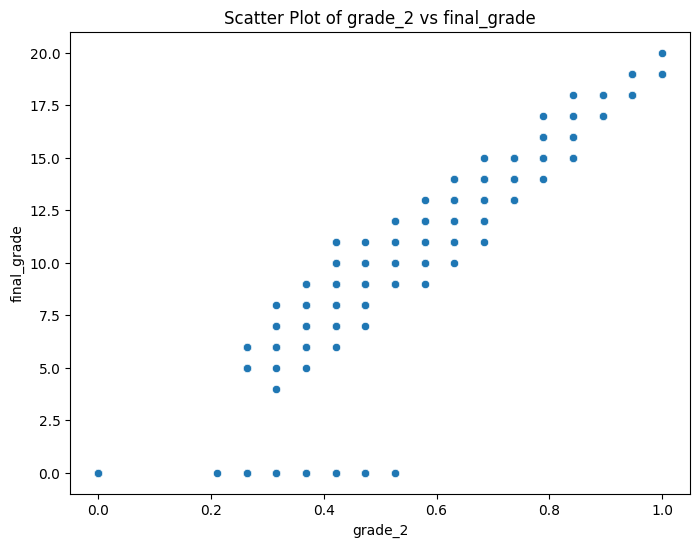

In [22]:
# Example for one feature 'grade_2'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=new_df['grade_2'], y=new_df['final_grade'])
plt.title("Scatter Plot of grade_2 vs final_grade")
plt.xlabel("grade_2")
plt.ylabel("final_grade")
plt.show()


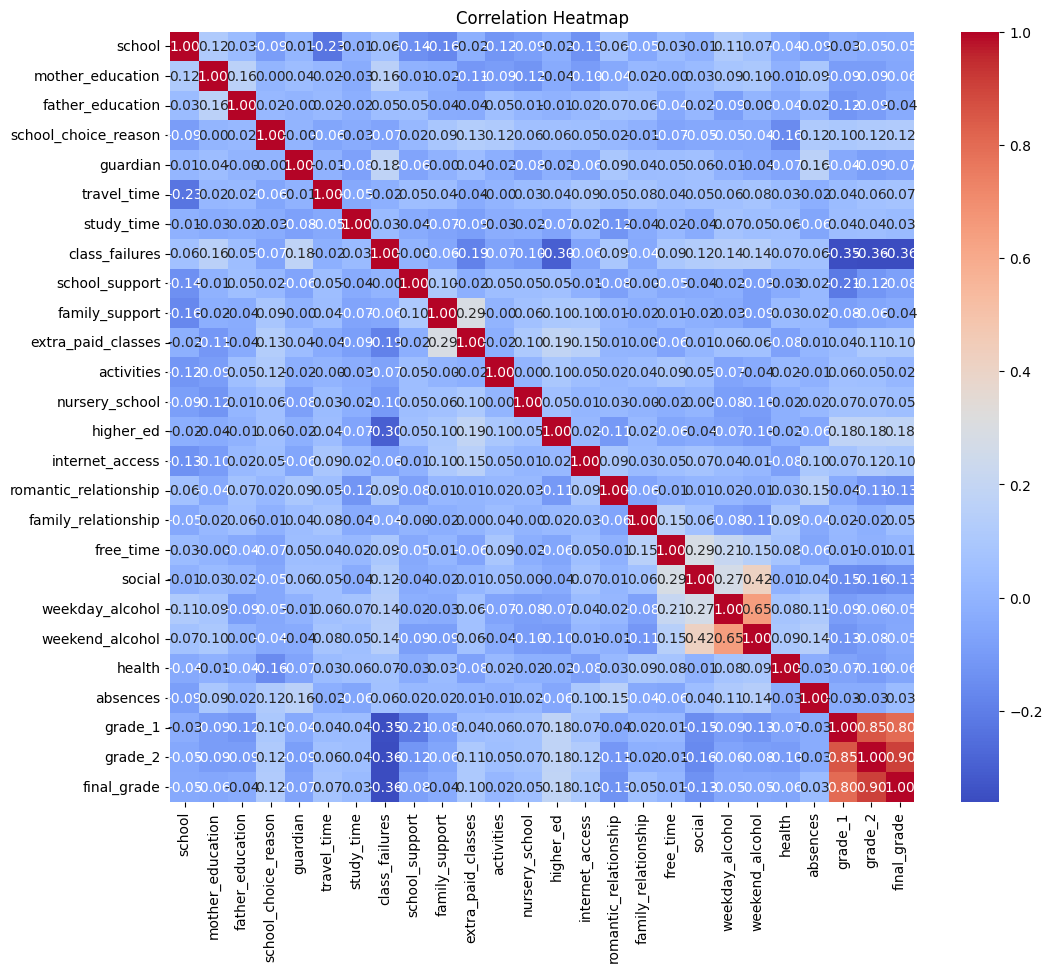

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculating the correlation matrix
correlation_matrix = new_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [24]:
#Splitting the data
X= new_df[important_features]
y= new_df['final_grade']

In [25]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [26]:
X= scaler.fit_transform(X[important_features])

In [27]:
X = pd.DataFrame(X, columns=important_features)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [29]:
#Using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
#Initializing and training the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=10,max_depth=20,min_samples_leaf=1,min_samples_split=10,random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=10,
                      random_state=42)

In [31]:
y_pred_rf = random_forest_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

In [32]:
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R^2:", r2_rf)
print("Random Forest MAE:", mae_rf)

Random Forest RMSE: 2.5193421712020876
Random Forest R^2: 0.6953520270353435
Random Forest MAE: 1.4188944548591058


In [33]:
cross_val_score(random_forest_model, X_test, y_test, cv=5, scoring='neg_mean_squared_error')

array([-15.91401631,  -6.96058696,  -6.68270604,  -4.77229409,
       -14.03753404])

In [34]:
#Using XGBoost

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
gbm_model = GradientBoostingRegressor(random_state=42)

In [37]:
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [38]:
y_pred_gbm = gbm_model.predict(X_test)

In [39]:
rmse_gbm = mean_squared_error(y_test, y_pred_gbm, squared=False)

In [40]:
r2_gbm = r2_score(y_test, y_pred_gbm)

In [41]:
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)

In [42]:
print("GBM RMSE:", rmse_gbm)
print("GBM R^2:", r2_gbm)
print("GBM MAE:", mae_gbm)

GBM RMSE: 2.502687161866276
GBM R^2: 0.6993666808846485
GBM MAE: 1.422205520228104


In [43]:
#Using linear regression

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_linear = linear_model.predict(X_test)
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_linear, squared=False))
print("Linear Regression R^2:", r2_score(y_test, y_pred_linear))
print("Mean absolute error:", mean_absolute_error(y_test,y_pred_linear))

Linear Regression RMSE: 2.0528163738443914
Linear Regression R^2: 0.7944869373070655
Mean absolute error: 1.2526358502082504


In [45]:
#Define the hyperparameter grid to search
parameter_grid= {
    'n_estimators': [10, 20, 30],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [46]:
#We have to create a grid search instance
Grid_Search= GridSearchCV(random_forest_model,parameter_grid,cv=10,scoring='neg_mean_squared_error')

In [47]:
#Fitting the grid search into the training data
Grid_Search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=20, min_samples_split=10,
                                             n_estimators=10, random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30]},
             scoring='neg_mean_squared_error')

In [48]:
models_predicted_fr= np.round(y_pred_rf).astype(int)
model_predicted_xg=np.round(y_pred_gbm).astype(int)

In [49]:
print((y_test,models_predicted_fr))
print((y_test,model_predicted_xg))

(78     10
371    12
248     5
55     10
390     9
       ..
364    12
82      6
114     9
3      15
18      5
Name: final_grade, Length: 79, dtype: int64, array([18,  8, 14, 13,  8, 11,  9, 11, 11, 12, 12,  9, 11, 18, 11, 16, 14,
        8, 10, 10, 12,  6, 15, 11, 10,  9, 15, 15, 13, 13,  8,  3,  9, 10,
        0,  9,  9,  8, 15,  4, 15, 18, 11, 11,  6, 12,  9,  8, 13, 13, 15,
       10,  9,  9, 13,  8, 12, 13,  8,  6, 10,  9,  5, 11, 12, 11, 18, 14,
       10,  9,  6,  9,  9, 13, 11, 13,  8, 18,  9]))
(78     10
371    12
248     5
55     10
390     9
       ..
364    12
82      6
114     9
3      15
18      5
Name: final_grade, Length: 79, dtype: int64, array([18,  8, 14, 13,  8, 10,  9, 11, 11, 12, 12,  9, 11, 18, 11, 16, 14,
        8, 10,  9, 12,  6, 15, 11, 10,  9, 15, 15, 13, 13,  7,  3,  8, 10,
        0,  8,  9,  8, 15,  4, 15, 19, 10, 11,  6, 12,  9,  8, 13, 13, 15,
       10,  9,  8, 13,  8, 12, 13,  8,  6, 10,  9,  6, 10, 12, 10, 18, 13,
        9,  8,  6,  9,  9, 13, 11, 

In [50]:
#We need to get the best hyperparameter
best_parameters=Grid_Search.best_params_

In [51]:
best_parameters

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 10}

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Best parameters from grid search
best_params = {
    'max_depth': 20,
    'min_samples_leaf': 1,
    'min_samples_split': 10,
    'n_estimators': 10
}

# Instantiate the model with the best parameters
random_forest_model = RandomForestRegressor(**best_params)

# Train the model on the training set
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = random_forest_model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate MSE
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared (R²)
r2 = r2_score(y_test, predictions)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 1.5174444111981344
Mean Squared Error (MSE): 5.6740868167584875
R-squared (R²): 0.7232834071250764


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the parameters for grid search (excluding 'normalize')
param_grid = {
    'fit_intercept': [True, False]
}

# Create a pipeline with data scaling and linear regression
pipeline = make_pipeline(StandardScaler(), LinearRegression())

# Create the Grid Search
grid_search = GridSearchCV(pipeline, {'linearregression__' + key: value for key, value in param_grid.items()}, cv=5)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Extract the best Linear Regression model
linear_model = grid_search.best_estimator_

# Make predictions
predictions = linear_model.predict(X_test)

# Calculate MAE, MSE, and R²
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Best Parameters: {'linearregression__fit_intercept': True}
Mean Absolute Error (MAE): 1.2526358502082517
Mean Squared Error (MSE): 4.214055064723637
R-squared (R²): 0.7944869373070655


In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have multiple models trained, e.g., model1, model2, model3...
# And a test dataset (X_test, y_test)

# Define your models here
model1 = random_forest_model
model2 = gbm_model
model3 = linear_model

# Evaluate each model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mae, mse, r2

# Store the models in a dictionary for convenience
models = {'model1': model1, 'model2': model2, 'model3': model3}

# Initialize an empty dictionary to store performance records
performance_records = {}

# Iterate over models and evaluate
for name, model in models.items():
    mae, mse, r2 = evaluate_model(model, X_test, y_test)
    performance_records[name] = {'MAE': mae, 'MSE': mse, 'R2': r2}
    print(f"{name} - MAE: {mae}, MSE: {mse}, R2: {r2}")

# Select the best model based on the chosen metric, e.g., lowest MSE
best_model_name = min(performance_records, key=lambda x: performance_records[x]['MSE'])
best_model = models[best_model_name]

print(f"The best model is {best_model_name} with MSE: {performance_records[best_model_name]['MSE']}")


model1 - MAE: 1.5174444111981344, MSE: 5.6740868167584875, R2: 0.7232834071250764
model2 - MAE: 1.1192122302286116, MSE: 4.11093763704, R2: 0.7995158175791061
model3 - MAE: 1.2526358502082517, MSE: 4.214055064723637, R2: 0.7944869373070655
The best model is model2 with MSE: 4.11093763704


In [55]:
best_model= gbm_model

In [56]:
best_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [58]:
#Saving the model
from joblib import dump
gbm_model = best_model
dump(gbm_model, 'gbm_model.joblib')


['gbm_model.joblib']

In [59]:
import pickle

# Assume gbm_model is your trained GBM model
gbm_model = best_model

# Save the model to a file
with open('gbm_model.pkl', 'wb') as file:
    pickle.dump(gbm_model, file)


In [68]:
X = new_df.drop('final_grade', axis=1)
y = new_df['final_grade']

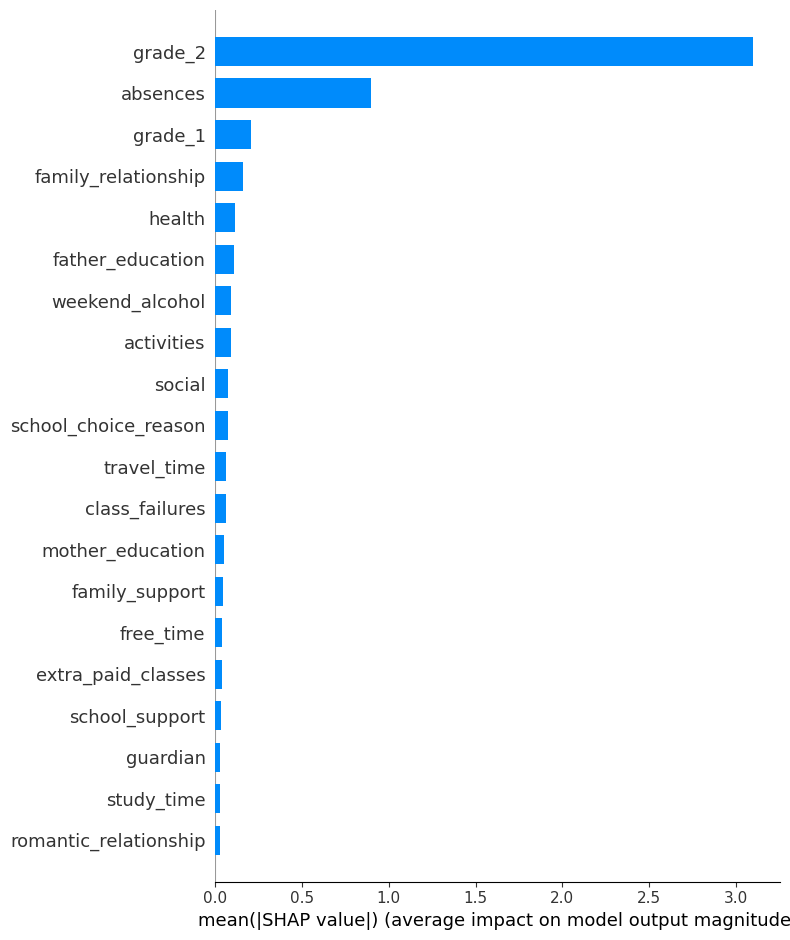

In [70]:
X = new_df.drop('final_grade', axis=1)  # 'target_column' is the name of your target variable column
y = new_df['final_grade']

# Train a model (example with XGBoost)
model = xgb.XGBRegressor()
model.fit(X, y)

# Create a SHAP explainer and calculate SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Plot summary plot
shap.summary_plot(shap_values, X, plot_type="bar")

In [63]:
important_features

['extra_paid_classes', 'grade_2', 'grade_1']